In [41]:
import json

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

from PIL import Image, ImageDraw


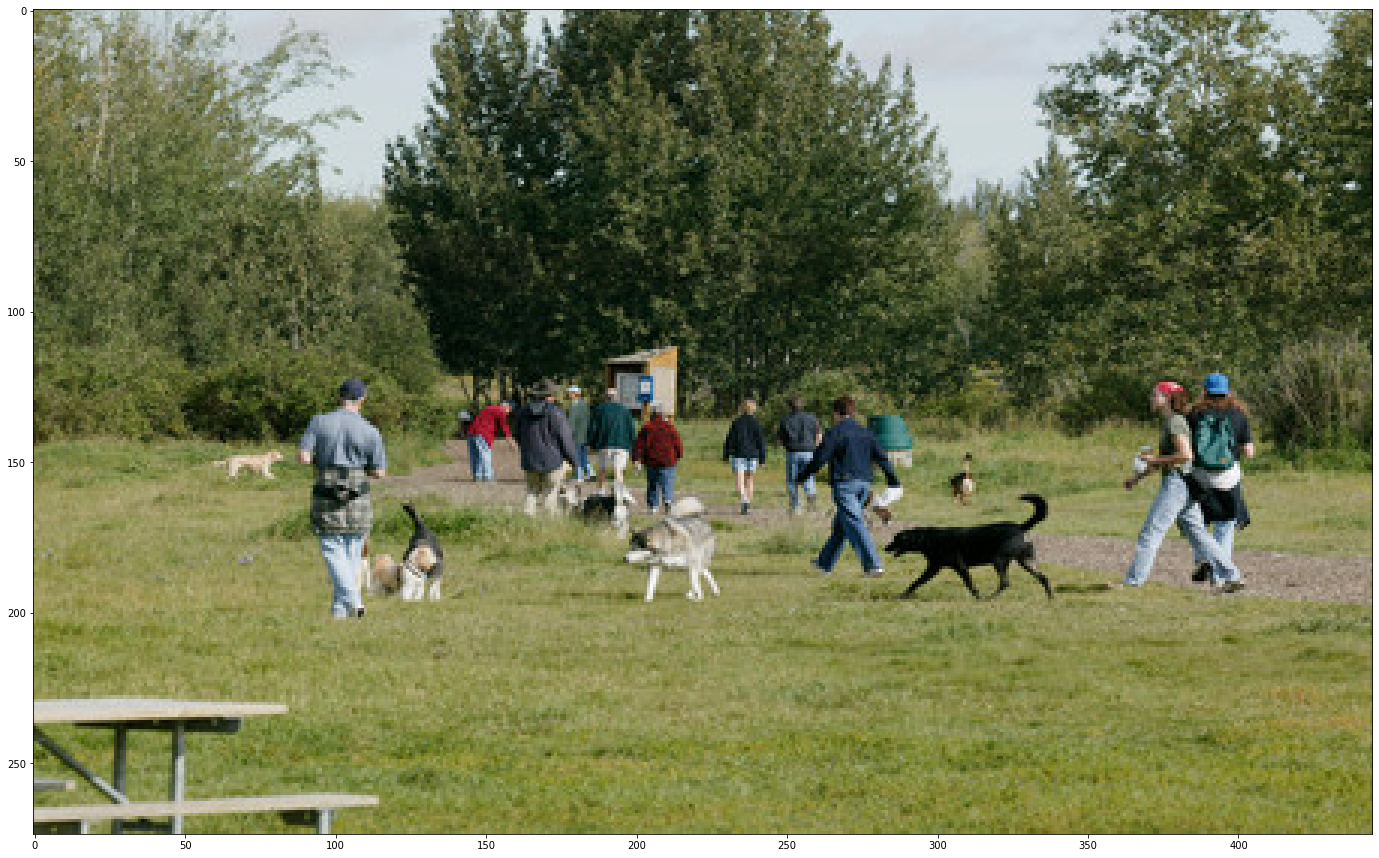

In [2]:
# ## Helper code
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)


image_path = './images/dogs.jpg'

image = Image.open(image_path)

image_np = load_image_into_numpy_array(image)

plt.figure(figsize=(24, 32))
plt.imshow(image_np)
plt.show()

In [3]:
print('loading model...')
hub_model = hub.load(
    './model/faster_rcnn_inception_resnet_v2_640x640_1/')
print('model loaded!')

loading model...
model loaded!


In [4]:
# running inference
results = hub_model([image_np])

# different object detection models have additional results
# all of them are explained in the documentation
result = {key:value.numpy() for key,value in results.items()}
print(result.keys())

dict_keys(['num_detections', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_scores', 'detection_classes', 'detection_boxes', 'detection_anchor_indices', 'raw_detection_boxes'])


In [92]:
image_path = './images/dogs.jpg'

image = Image.open(image_path)

def draw_bounding_box_on_image(image, 
                           ymin,
                           xmin,
                           ymax,
                           xmax,
                           label,
                           color='red',
                           thickness=4,
                           use_normalized_coordinates=True):
  """Adds a bounding box to an image.
  """
  im_width, im_height = image.size
  if use_normalized_coordinates:
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                  ymin * im_height, ymax * im_height)
  rect = patches.Rectangle((left, bottom),right-left,top-bottom,linewidth=5,edgecolor='r',facecolor='none')
  rect.set_label(label)
  return rect

18.0 0.99530643 [0.5855983 0.6344865 0.7156153 0.7642099]
18.0 0.9869783 [0.44559288 0.19799955 0.7426138  0.26609012]
18.0 0.98304707 [0.47047302 0.5706782  0.6884244  0.64823025]
18.0 0.9829298 [0.44841433 0.81198835 0.70458233 0.8996089 ]
18.0 0.9596262 [0.43979523 0.8532338  0.70575076 0.9119479 ]
18.0 0.9282851 [0.5921192  0.43975446 0.7186179  0.5132876 ]
18.0 0.8950582 [0.47436914 0.51277506 0.61402875 0.5489902 ]
18.0 0.88354635 [0.45641255 0.35572407 0.6182055  0.41557175]
18.0 0.82449603 [0.48207536 0.44899246 0.61346763 0.48706254]
18.0 0.7027102 [0.47158828 0.5521102  0.6113005  0.58960766]


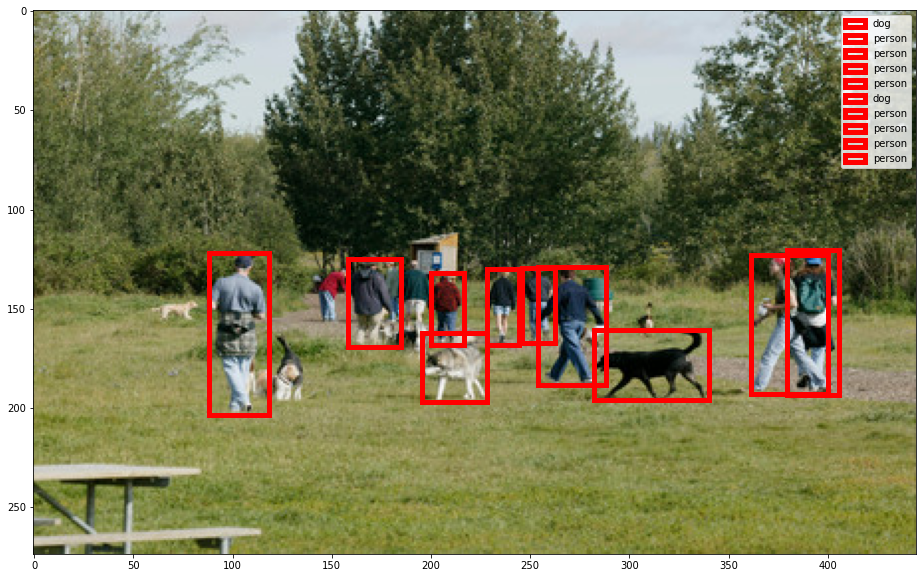

In [97]:
# Create figure and axes
fig,ax = plt.subplots(1, figsize=(20, 10))

DETECTION_THRESHOLD = 0.7
NUM_RESULTS = (result['detection_scores'] >= DETECTION_THRESHOLD).sum()
LABELS_PATH = './mscoco_label_map.json'
with open(LABELS_PATH, 'r') as f:
    label_mapping = json.load(f)

label_mapping = {int(k):v for k,v in label_mapping.items()}


for label, score, box in zip(result['detection_classes'][0][:NUM_RESULTS], 
                          result['detection_scores'][0][:NUM_RESULTS], 
                          result['detection_boxes'][0][:NUM_RESULTS]):
    print(obj, score, box)


    # Create a Rectangle patch
    rect = draw_bounding_box_on_image(image, box[0], box[1], box[2], box[3], label_mapping[label])
    # Add the patch to the Axes
    ax.add_patch(rect)


# Display the image
ax.imshow(image_np)
ax.legend()
plt.show()